### Import Libraries

In [20]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset

In [13]:
# Load the dataset
locationdf = pd.read_csv('datasets\location.csv')
ratingsdf = pd.read_csv('datasets\\ratings.csv')
zomatodf = pd.read_csv('datasets\zomato.csv')

# Display basic info
print(locationdf.info())
locationdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6830 entries, 0 to 6829
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6830 non-null   int64  
 1   address           6830 non-null   object 
 2   city              6830 non-null   object 
 3   city_id           6830 non-null   int64  
 4   country_id        6830 non-null   int64  
 5   latitude          6830 non-null   float64
 6   locality          6830 non-null   object 
 7   locality_verbose  6830 non-null   object 
 8   longitude         6830 non-null   float64
 9   zipcode           117 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 533.7+ KB
None


,id,address,city,city_id,country_id,latitude,locality,locality_verbose,longitude,zipcode
0,6316125,"V. Corporate Center, Soliman Street, Salcedo V...",Makati City,63,162,14.560313,Salcedo Village,"Salcedo Village, Makati City",121.024638,NaN
1,18409457,"Level 3, Greenbelt 3, Ayala Center, Greenbelt,...",Makati City,63,162,14.552137,"Greenbelt 3, San Lorenzo, Makati City","Greenbelt 3, San Lorenzo, Makati City, Makati ...",121.021325,NaN
2,6307689,"5012 P. Burgos Street, Poblacion, Makati City ...",Makati City,63,162,14.563144,Poblacion,"Poblacion, Makati City",121.029800,1210.0
3,18581637,"CKB Centre, Tomas Morato Avenue Corner Scout R...",Quezon City,63,162,14.633713,Tomas Morato,"Tomas Morato, Quezon City",121.035026,NaN
4,6315438,"Sixth Floor, SM Aura Premier, C5 Road Corner 2...",Taguig City,63,162,14.546236,"SM Aura Premier, Bonifacio Global City, Taguig...","SM Aura Premier, Bonifacio Global City, Taguig...",121.054365,NaN


In [14]:
# Display basic info
print(ratingsdf.info())
ratingsdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6830 entries, 0 to 6829
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6830 non-null   int64  
 1   aggregate_rating  6830 non-null   float64
 2   rating_color      6830 non-null   object 
 3   rating_text       6830 non-null   object 
 4   votes             6830 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 266.9+ KB
None


,id,aggregate_rating,rating_color,rating_text,votes
0,6316125,4.9,3F7E00,Excellent,1394
1,18409457,4.6,3F7E00,Excellent,602
2,6307689,4.0,5BA829,Very Good,563
3,18581637,4.0,5BA829,Very Good,413
4,6315438,4.6,3F7E00,Excellent,960


In [15]:
# Display basic info
print(zomatodf.info())
zomatodf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6830 entries, 0 to 6829
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6830 non-null   int64  
 1   average_cost_for_two            6830 non-null   int64  
 2   book_url                        518 non-null    object 
 3   cuisines                        6829 non-null   object 
 4   currency                        6830 non-null   object 
 5   deeplink                        6830 non-null   object 
 6   events_url                      6830 non-null   object 
 7   featured_image                  6248 non-null   object 
 8   has_online_delivery             6830 non-null   int64  
 9   has_table_booking               6830 non-null   int64  
 10  include_bogo_offers             6830 non-null   bool   
 11  is_book_form_web_view           6828 non-null   float64
 12  is_delivering_now               68

,id,average_cost_for_two,book_url,cuisines,currency,deeplink,events_url,featured_image,has_online_delivery,has_table_booking,...,is_delivering_now,is_table_reservation_supported,is_zomato_book_res,menu_url,mezzo_provider,name,photos_url,price_range,thumb,url
0,6316125,1000,NaN,"Japanese, Ramen",P,zomato://restaurant/6316125,https://www.zomato.com/manila/mendokoro-ramenb...,https://b.zmtcdn.com/data/reviews_photos/971/2...,0,0,...,0,0,0.0,https://www.zomato.com/manila/mendokoro-ramenb...,OTHER,Mendokoro Ramenba,https://www.zomato.com/manila/mendokoro-ramenb...,3,https://b.zmtcdn.com/data/reviews_photos/971/2...,https://www.zomato.com/manila/mendokoro-ramenb...
1,18409457,1300,NaN,"Korean, Grill, Korean BBQ",P,zomato://restaurant/18409457,https://www.zomato.com/manila/soban-k-town-gri...,https://b.zmtcdn.com/data/res_imagery/18290970...,0,0,...,0,0,0.0,https://www.zomato.com/manila/soban-k-town-gri...,OTHER,Soban K-Town Grill,https://www.zomato.com/manila/soban-k-town-gri...,3,https://b.zmtcdn.com/data/res_imagery/18290970...,https://www.zomato.com/manila/soban-k-town-gri...
2,6307689,1600,NaN,"American, Filipino",P,zomato://restaurant/6307689,https://www.zomato.com/manila/filling-station-...,https://b.zmtcdn.com/data/pictures/9/6307689/b...,0,0,...,0,0,0.0,https://www.zomato.com/manila/filling-station-...,OTHER,Filling Station,https://www.zomato.com/manila/filling-station-...,4,https://b.zmtcdn.com/data/pictures/9/6307689/b...,https://www.zomato.com/manila/filling-station-...
3,18581637,1000,NaN,Korean,P,zomato://restaurant/18581637,https://www.zomato.com/manila/romantic-baboy-t...,https://b.zmtcdn.com/data/reviews_photos/cc1/a...,0,0,...,0,0,0.0,https://www.zomato.com/manila/romantic-baboy-t...,OTHER,Romantic Baboy,https://www.zomato.com/manila/romantic-baboy-t...,3,https://b.zmtcdn.com/data/reviews_photos/cc1/a...,https://www.zomato.com/manila/romantic-baboy-t...
4,6315438,3000,NaN,"Seafood, American, Mediterranean, Japanese",P,zomato://restaurant/6315438,https://www.zomato.com/manila/niu-by-vikings-b...,https://b.zmtcdn.com/data/pictures/chains/8/63...,0,0,...,0,0,0.0,https://www.zomato.com/manila/niu-by-vikings-b...,OTHER,NIU by Vikings,https://www.zomato.com/manila/niu-by-vikings-b...,4,https://b.zmtcdn.com/data/pictures/chains/8/63...,https://www.zomato.com/manila/niu-by-vikings-b...


In [16]:
# Merge the datasets
df = pd.merge(locationdf, ratingsdf, on='id')
df = pd.merge(df, zomatodf, on='id')
df.head()

,id,address,city,city_id,country_id,latitude,locality,locality_verbose,longitude,zipcode,...,is_delivering_now,is_table_reservation_supported,is_zomato_book_res,menu_url,mezzo_provider,name,photos_url,price_range,thumb,url
0,6316125,"V. Corporate Center, Soliman Street, Salcedo V...",Makati City,63,162,14.560313,Salcedo Village,"Salcedo Village, Makati City",121.024638,NaN,...,0,0,0.0,https://www.zomato.com/manila/mendokoro-ramenb...,OTHER,Mendokoro Ramenba,https://www.zomato.com/manila/mendokoro-ramenb...,3,https://b.zmtcdn.com/data/reviews_photos/971/2...,https://www.zomato.com/manila/mendokoro-ramenb...
1,18409457,"Level 3, Greenbelt 3, Ayala Center, Greenbelt,...",Makati City,63,162,14.552137,"Greenbelt 3, San Lorenzo, Makati City","Greenbelt 3, San Lorenzo, Makati City, Makati ...",121.021325,NaN,...,0,0,0.0,https://www.zomato.com/manila/soban-k-town-gri...,OTHER,Soban K-Town Grill,https://www.zomato.com/manila/soban-k-town-gri...,3,https://b.zmtcdn.com/data/res_imagery/18290970...,https://www.zomato.com/manila/soban-k-town-gri...
2,6307689,"5012 P. Burgos Street, Poblacion, Makati City ...",Makati City,63,162,14.563144,Poblacion,"Poblacion, Makati City",121.029800,1210.0,...,0,0,0.0,https://www.zomato.com/manila/filling-station-...,OTHER,Filling Station,https://www.zomato.com/manila/filling-station-...,4,https://b.zmtcdn.com/data/pictures/9/6307689/b...,https://www.zomato.com/manila/filling-station-...
3,18581637,"CKB Centre, Tomas Morato Avenue Corner Scout R...",Quezon City,63,162,14.633713,Tomas Morato,"Tomas Morato, Quezon City",121.035026,NaN,...,0,0,0.0,https://www.zomato.com/manila/romantic-baboy-t...,OTHER,Romantic Baboy,https://www.zomato.com/manila/romantic-baboy-t...,3,https://b.zmtcdn.com/data/reviews_photos/cc1/a...,https://www.zomato.com/manila/romantic-baboy-t...
4,6315438,"Sixth Floor, SM Aura Premier, C5 Road Corner 2...",Taguig City,63,162,14.546236,"SM Aura Premier, Bonifacio Global City, Taguig...","SM Aura Premier, Bonifacio Global City, Taguig...",121.054365,NaN,...,0,0,0.0,https://www.zomato.com/manila/niu-by-vikings-b...,OTHER,NIU by Vikings,https://www.zomato.com/manila/niu-by-vikings-b...,4,https://b.zmtcdn.com/data/pictures/chains/8/63...,https://www.zomato.com/manila/niu-by-vikings-b...


In [17]:
# show column names
df.columns

Index(['id', 'address', 'city', 'city_id', 'country_id', 'latitude',
       'locality', 'locality_verbose', 'longitude', 'zipcode',
       'aggregate_rating', 'rating_color', 'rating_text', 'votes',
       'average_cost_for_two', 'book_url', 'cuisines', 'currency', 'deeplink',
       'events_url', 'featured_image', 'has_online_delivery',
       'has_table_booking', 'include_bogo_offers', 'is_book_form_web_view',
       'is_delivering_now', 'is_table_reservation_supported',
       'is_zomato_book_res', 'menu_url', 'mezzo_provider', 'name',
       'photos_url', 'price_range', 'thumb', 'url'],
      dtype='object')

### Data Preparation / EDA

In [27]:
# Check the distribution of the cities in the dataset
city_counts = df['city'].value_counts()
city_counts

city
Quezon City         2016
Makati City          976
Taguig City          648
Manila               626
Mandaluyong City     443
Pasig City           373
Muntinlupa City      343
Parañaque City       299
Pasay City           241
Marikina City        211
San Juan City        195
Las Piñas City       183
Caloocan City        114
Valenzuela City      108
Tagaytay City         27
Pateros City          15
Malabon City          12
Name: count, dtype: int64

C:\Users\cheaf\AppData\Local\Temp\ipykernel_19152\3976476402.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='city', data=df, order=city_order, palette='viridis')


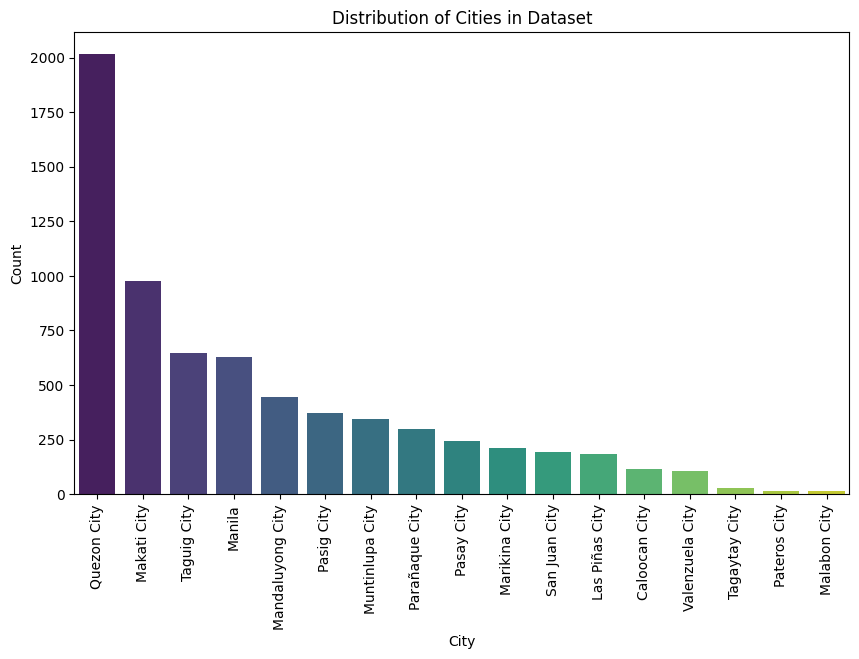

In [29]:
# Calculate city counts and sort in descending order
city_order = df['city'].value_counts().index

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create a countplot for city distribution with cities ordered by count
sns.countplot(x='city', data=df, order=city_order, palette='viridis')

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)
plt.title("Distribution of Cities in Dataset")
plt.xlabel("City")
plt.ylabel("Count")

# Display the plot
plt.show()

In [30]:
# Distribution of cuisines
cuisine_counts = df['cuisines'].value_counts()
cuisine_counts

cuisines
Filipino                        852
Coffee                          347
American                        320
Japanese                        317
Chinese                         245
                               ... 
Coffee, American, Filipino        1
Filipino, Italian, European       1
Italian, Filipino, Desserts       1
Mediterranean, International      1
Deli, Filipino                    1
Name: count, Length: 698, dtype: int64

C:\Users\cheaf\AppData\Local\Temp\ipykernel_19152\2046368422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='cuisines', data=df, order=df['cuisines'].value_counts().iloc[:20].index, palette='viridis')


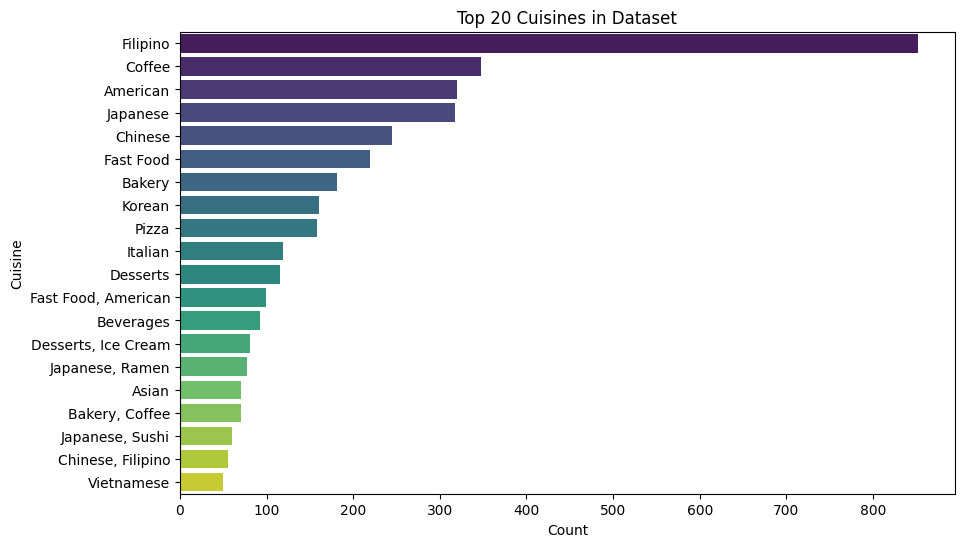

In [42]:
# plot the top 10 cuisines
plt.figure(figsize=(10, 6))
sns.countplot(y='cuisines', data=df, order=df['cuisines'].value_counts().iloc[:20].index, palette='viridis')
plt.title("Top 20 Cuisines in Dataset")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()

In [43]:
# Check each cuisine in the dataset and separate the cuisines that are separated by commas into individual cuisines, store in a new dataset along with their counts
cuisine_list = df['cuisines'].str.split(', ')
cuisine_counts = cuisine_list.explode().value_counts()
cuisine_counts

cuisines
Filipino          1578
American          1055
Coffee             787
Japanese           676
Fast Food          559
                  ... 
Cafe Food            1
Coffee and Tea       1
Teriyaki             1
West Indian          1
Deli                 1
Name: count, Length: 79, dtype: int64

C:\Users\cheaf\AppData\Local\Temp\ipykernel_19152\1970277965.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='cuisines', data=df, order=df['cuisines'].str.split(', ').explode().value_counts().iloc[:20].index, palette='viridis')


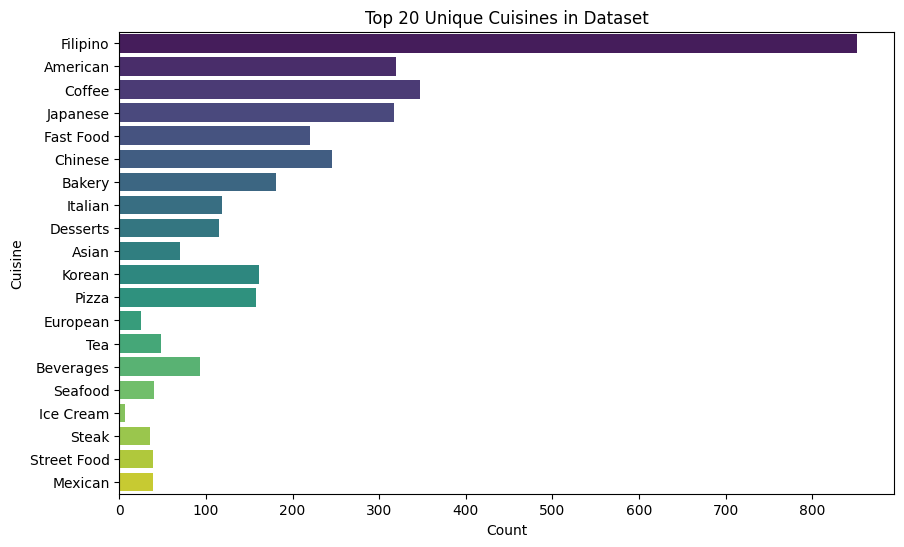

In [44]:
# Display top 10 unique cuisines in the cuisines set
cuisine_counts = df['cuisines'].str.split(', ').explode().value_counts()
cuisine_counts.head(10)

# Display the top 10 unique cuisines in the dataset
plt.figure(figsize=(10, 6))
sns.countplot(y='cuisines', data=df, order=df['cuisines'].str.split(', ').explode().value_counts().iloc[:20].index, palette='viridis')
plt.title("Top 20 Unique Cuisines in Dataset")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()

C:\Users\cheaf\AppData\Local\Temp\ipykernel_19152\1764003001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='aggregate_rating', y='city', data=df, palette='viridis')


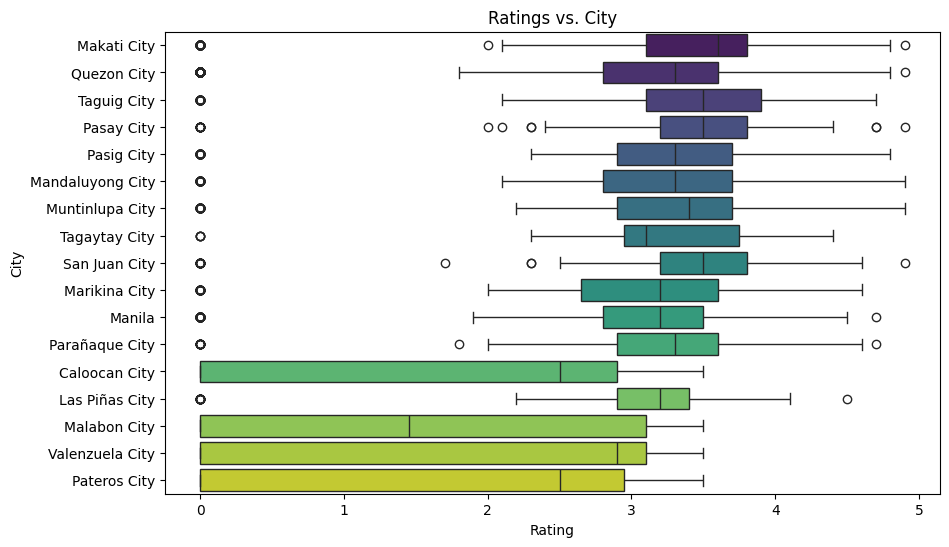

In [46]:
# Ratings vs. City
plt.figure(figsize=(10, 6))
sns.boxplot(x='aggregate_rating', y='city', data=df, palette='viridis')
plt.title("Ratings vs. City")
plt.xlabel("Rating")
plt.ylabel("City")
plt.show()

C:\Users\cheaf\AppData\Local\Temp\ipykernel_19152\964634487.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='aggregate_rating', y='cuisines', data=df, order=df['cuisines'].str.split(', ').explode().value_counts().iloc[:20].index, palette='viridis')


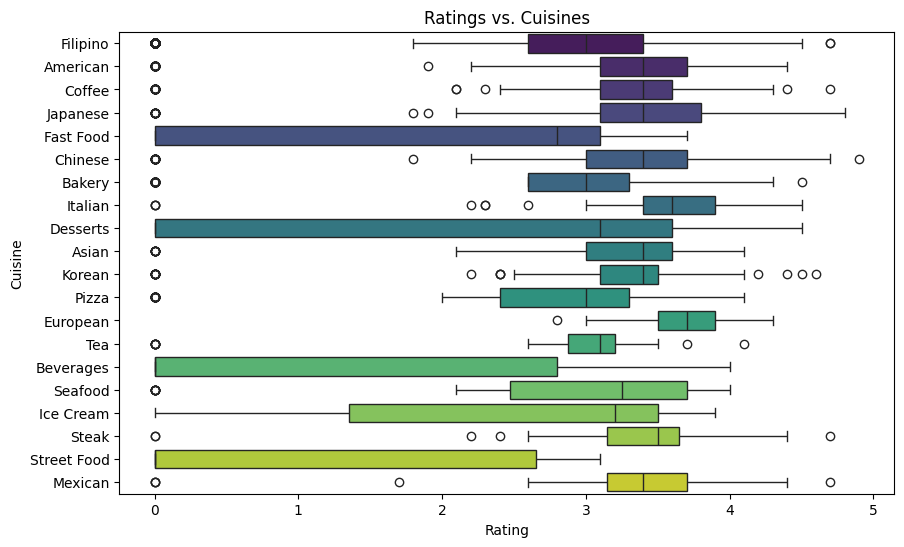

In [48]:
# Ratings vs. Cuisines top 20
plt.figure(figsize=(10, 6))
sns.boxplot(x='aggregate_rating', y='cuisines', data=df, order=df['cuisines'].str.split(', ').explode().value_counts().iloc[:20].index, palette='viridis')
plt.title("Ratings vs. Cuisines")
plt.xlabel("Rating")
plt.ylabel("Cuisine")
plt.show()

### Feature Selection

In [ ]:
# Select relevant features
features = ['aggregate_rating', 'city', 'cuisine']  # Customize based on your data
df_features = df[features]

# Convert categorical data (e.g., cuisine) into numerical form using one-hot encoding
df_features = pd.get_dummies(df_features, columns=['cuisine'], drop_first=True)

### Normalize Data

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

### Recommender Model

In [ ]:
# Fit the KNN model
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(scaled_features)

# Define a function to get recommendations
def get_recommendations(restaurant_name, df, model, scaler):
    # Find the index of the restaurant
    index = df[df['name'] == restaurant_name].index[0]
    
    # Scale the input restaurant's features
    restaurant_features = scaler.transform([df_features.iloc[index]])
    
    # Find the nearest neighbors
    distances, indices = model.kneighbors(restaurant_features)
    
    # Get recommended restaurant names and distances
    recommendations = df.iloc[indices[0]].copy()
    recommendations['distance'] = distances[0]
    return recommendations

# Example usage
recommendations = get_recommendations("Restaurant A", df, knn, scaler)
print(recommendations[['name', 'rating', 'price', 'distance']])